# ML Exercise 1 - Linear regression

## 1. Linear regression with one variable

**题目要求**：

    ⽂件 ex1data1.txt 包含线性回归问题的数据集。
    
        第⼀列是城市的⼈⼝(population)，第⼆列是该城市餐⻋的利润(profit)。利润上的负值表示损失。

        数据集中第一列表示输入值x，第二行表示结果y


### 1.1 绘制数据
对于此数据集，使用散点图(scatter plot)来可视化该数据。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "ex1data1.txt"
# 加载数据
dataset = pd.read_csv(path, header=None, names=['population', 'profit'])
dataset

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [464]:
# 数据处理 head( n ) 方法用于读取前面的 n 行，如果不填参数 n ，默认返回 5 行
dataset.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [465]:
# describe() 显示统计结果
dataset.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


创建一个散点图
使用`pandas.plot`函数: `df.plot(kind='scatter', x='col1', y='col2')`

`x`	设置 x 轴的数据列

`y`	设置 y 轴的数据列

`title`	图表的标题

`xlabel`	x 轴的标签

`ylabel`	y 轴的标签

`color`	设置图表的颜色

`figsize`	设置图表的大小（宽, 高）
`legend`	是否显示图例

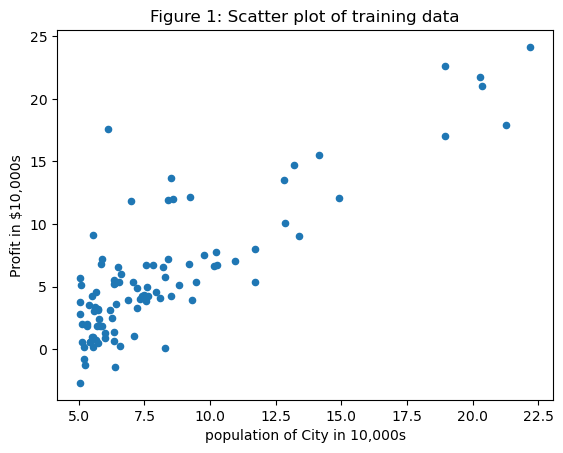

<Figure size 1200x800 with 0 Axes>

In [466]:
dataset.plot(kind='scatter', x='population', y='profit', xlabel='population of City in 10,000s', 
              ylabel='Profit in $10,000s', title='Figure 1: Scatter plot of training data')

plt.figure(figsize=(12, 8))
plt.show()

### 1.2 Gradient Descent

    使用梯度下降把linear regression parameters θ to dataset

#### 1.2.1 Computer the cost $j(\theta )$

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [467]:
# remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set
def computerCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

$$
\begin{pmatrix}
 x_{11} & x_{12} \\
 x_{21} & x_{22} \\
 \vdots & \vdots \\
 x_{N1} & x_{N2}
\end{pmatrix}
\!
\begin{pmatrix}
\theta_1 \\ \theta_2 
\end{pmatrix}
-
\begin{pmatrix} 
y_1 \\ y_2 \\ \vdots \\ y_N  
\end{pmatrix}
=
\begin{pmatrix} 
x_{11}\theta_1 + x_{12}\theta_2 - y_1 \\
x_{21}\theta_1 + x_{22}\theta_2 - y_2 \\
\vdots \\
x_{N1}\theta_1 + x_{N2}\theta_2 - y_N
\end{pmatrix}
$$

其中$x_{1*}=1$ 就是下面插入1的原因。


In [468]:
dataset.insert(0, 'Ones',1)

做一些变量的初始化

In [469]:
#set X (training data) and y (target variable)
### shape 用法
### 返回列数：df.shape[1]
### 返回行数：df.shape[0] 或者：len(df)
cols = dataset.shape[1]
# 因为前面添加了一列计算，但是要去掉最后一列
### iloc & loc 提取数据
###  提取index为'a','b',列名为'A','B'中的数据
###     data.loc[['a','b'],['A','B']]
###  提取第0、1行，第0、1列中的数据
###     data.iloc[[0,1],[0,1]]

# 非最后一列
X = dataset.iloc[:, 0:cols-1]
# 最后一列
y = dataset.iloc[:, cols-1:cols]

``` python
y = dataset.iloc[:, -1]  # 为什么这个得出的结果参与运算，得出的值计算结果是错误的。
y = dataset.iloc[:, cols-1:cols]
```

这两个函数生成的数据并不同. 虽然都是获取了最后一列的数据,但是第一个并没有head.而第二个有head

In [470]:
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [471]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [472]:
# cost函数是一个矩阵，所以需要转换X与y
X = np.matrix(X.values)
y = np.matrix(y.values)


# 还需要初始化theta
theta = np.matrix(np.array([0,0]))
# theta = np.zeros(X.shape[1])
theta # theta 是一个1 * 2 的矩阵

matrix([[0, 0]])

In [473]:
# 看一下维度
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [474]:
# 计算代价函数
computerCost(X, y, theta)

32.072733877455676

#### 1.2.2 Gradient descent

验证梯度下降是否正常⼯作的⼀个好⽅法是查看 J(θ) 的值，并检查它是否随着每⼀步递减。
**最终的目标就是得到一个θ，能够来预测**
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
$$ \frac{\partial }{\partial {{\theta_0 }}}J\left( \theta_0  \right) = \frac{1}{N} \sum^{N}_{i = 1}(x_{i1}\theta_0+x_{i2}\theta_1-y_i)x_{i1}$$
$$ \frac{\partial }{\partial {{\theta_1 }}}J\left( \theta_1  \right) = \frac{1}{N} \sum^{N}_{i = 1}(x_{i1}\theta_0+x_{i2}\theta_1-y_i)x_{i2}$$

In [475]:
# iters: 迭代次数
# alpaht: learning rate
def gradient_descent(X, y, theta, alpha, iters):
    # np.zeros(theta.shape)：创建一个形状与 theta 相同的数组，其中所有元素都是0。
    tmp = np.array(np.zeros(theta.shape)) # 构建零值矩阵
    # ravel 可以将多维数组拉到一维数组
    parameters = int(theta.ravel().shape[1])  # 获取长度，即参数个数
    cost = np.zeros(iters)

    for i in range(iters):
        # 计算预测值与实际值之间的误差
        error = (X * theta.T) - y

        for j in range(parameters):
            # 计算梯度下降的项，即误差与对应特征的乘积之和
            term = np.multiply(error, X[:,j]) #计算偏导
            tmp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        theta = tmp;
        cost[i] = computerCost(X, y, theta)

    return theta, cost

In [476]:
# 初始化变量，学习速率&迭代次数
alpha = 0.01
iters = 1000

In [477]:
# 运行梯度下降算法，获得一个参数θ
g, cost = gradient_descent(X, y, theta, alpha, iters)
g

array([[-3.24140214,  1.1272942 ]])

In [478]:
# 拟合的参数计算训练模型的代价函数
computerCost(X, y, g)

4.515955503078914

##### 1.2.1.1 绘制线性模型以及数据

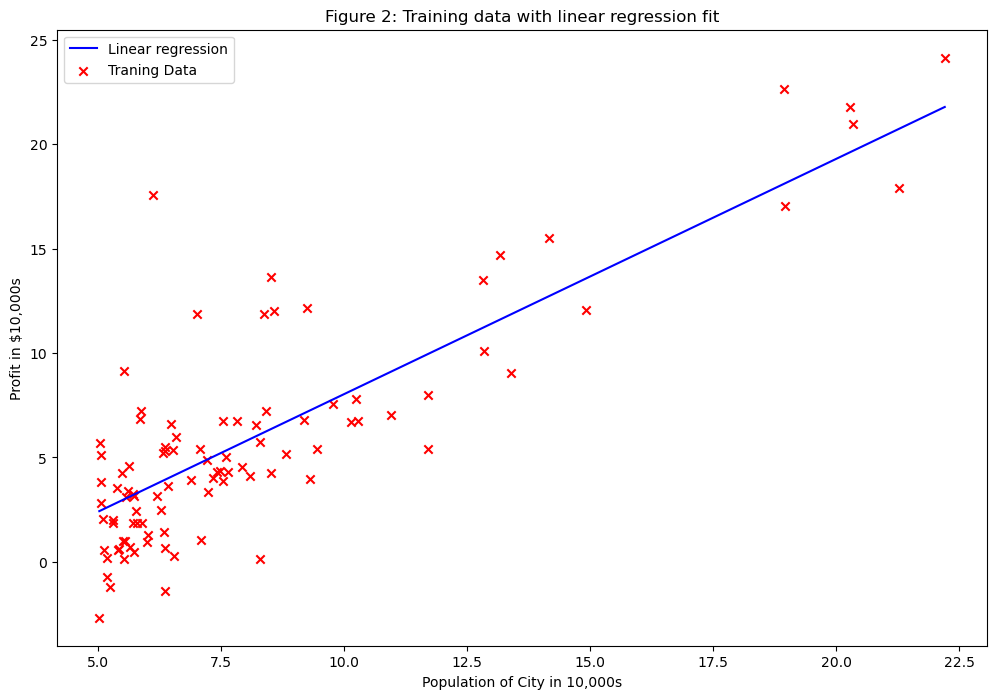

In [479]:
# np.linspace 创建一个一维数组，包含从 data.Population.min() 到 data.Population.max() 的100个等间隔的值。
x = np.linspace(dataset.population.min(), dataset.population.max(), 100)

# g 是线性回归模型的参数，其中 g[0, 0] 是截距，g[0, 1] 是斜率
f = g[0, 0] + (g[0, 1] * x)

# 创建一个图形和坐标轴对象
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, f, 'blue', label='Linear regression')
ax.scatter(dataset.population, dataset.profit, color='red', marker='x', label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Figure 2: Training data with linear regression fit')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

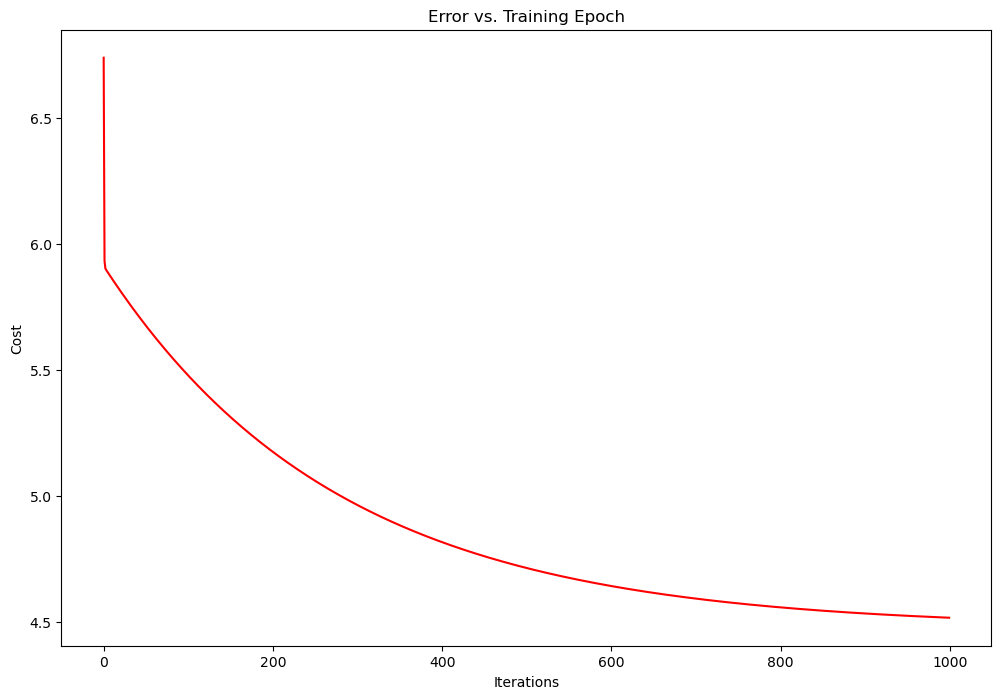

In [480]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 2.Linear regression with multiple variable

还有一个房屋价格数据集，第一列是房子的大小，第二列是卧室的数量，第三列是房子的价格。
建立一个模型来预测房子的价格。

In [481]:
path = 'ex1data2.txt'
dataset2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
dataset2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.1 Feature Normalization 特征归一化

- 从数据集中减去每个特征的平均值(mean)
- 对特征值进行按标准差(standard deviations)缩放

In [482]:
dataset2 = (dataset2 - dataset2.mean()) / dataset2.std()
dataset2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 2.2 Gradient Descent

In [483]:
# add ones column
dataset2.insert(0, 'Ones', 1)

# init X and y
cols = dataset2.shape[1]
X2 = dataset2.iloc[:, 0:cols-1]
y2 = dataset2.iloc[:, cols-1:cols]

In [484]:
X2.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [485]:
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
# theta = np.zeros(3) # 不能用这个，在gradient_descent这个函数里面有问题
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the dataset
g2, cost2 = gradient_descent(X2, y2, theta2, alpha, iters)

computerCost(X2, y2, g2)

0.13070336960771892

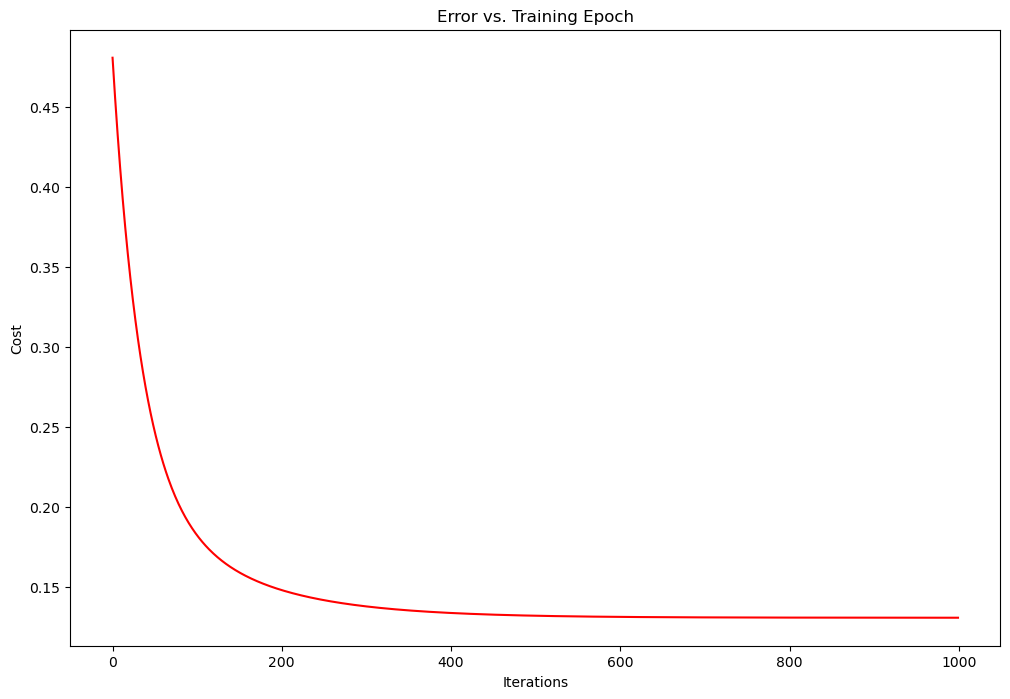

In [486]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 2.3 scikit-learn的线性回归函数

使用scikit-learn来预测单变量线性回归函数

In [487]:
from sklearn import linear_model
model = linear_model.LinearRegression()
# np.matrix 被弃用
model.fit(np.asarray(X), np.asarray(y))

LinearRegression()

scikit-learn model的预测表现

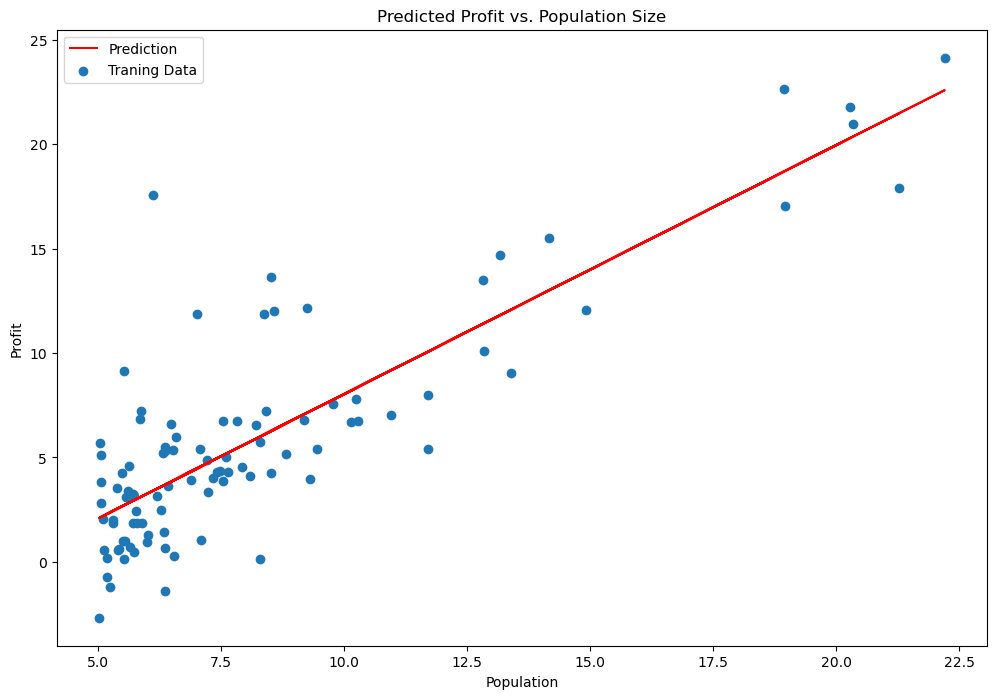

In [490]:
x = np.array(X[:, 1].A1)
f = model.predict(np.asarray(X)).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(dataset.population, dataset.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [491]:
## 3. normal equation

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，
 则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
 
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

- 梯度下降：

  - 需要选择学习率α
  - 需要多次迭代
  - 当特征数量n大时也能较好适用
  - 适用于各种类型的模型	

- 正规方程：

  - 不需要选择学习率α
  - 一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$
  - 如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的
  - 只适用于线性模型，不适合逻辑回归模型等其他模型

In [498]:
# 正规方程
def normal_equ(X, y):
    # np.linalg.inv(...) 用于计算矩阵的逆
    # 使用伪逆 np.linalg.pinv 替代逆矩阵，避免奇异矩阵问题
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [496]:
final_theta2=normal_equ(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])